In [1]:
import pandas as pd

In [2]:
with open("_chat.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# check first 5 lines
for l in lines[:5]:
    print(l.strip())



[26/10/20, 3:00:15 PM] Honey: ‎Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them.
[26/10/20, 3:00:15 PM] Honey: Does you know how to convert JAVA TIBCO EMS from java to python. At present we have the code base in java class. Just wanted to move it to python. Do we have any connector or drivers. Any suggestions please ?
‎[26/10/20, 4:28:16 PM] Priya: ‎video omitted
[26/10/20, 5:01:13 PM] Honey: Join this Messenger room to video chat (no account needed): https://msngr.com/pfaffifoeqfd?funnel_session_id=_c714aa4b-7910-4d18-a832-db65e0e23559
[26/10/20, 5:45:47 PM] Honey: Fruits,


In [3]:
chat_data= []

In [4]:
chat_data

[]

In [5]:
for line in lines:
    line = line.strip()
    if line.startswith("[") and "]" in line:
        datetime_part, content = line.split("]", 1)
        datetime_part = datetime_part.strip("[")

        # ✅ check before splitting
        if ", " in datetime_part:   
            date, time = datetime_part.split(", ", 1)
        else:
            continue  # skip bad lines

        if ": " in content:
            sender, message = content.split(": ", 1)
            sender = sender.strip()
        else:
            sender, message = "System", content.strip()

        chat_data.append([date, time, sender, message])


In [6]:
df = pd.DataFrame(chat_data, columns=["Date","Time","Sender","Message"])
print (df.head())

       Date         Time Sender  \
0  26/10/20   3:00:15 PM  Honey   
1  26/10/20   3:00:15 PM  Honey   
2  26/10/20   5:01:13 PM  Honey   
3  26/10/20   5:45:47 PM  Honey   
4  26/10/20  10:09:27 PM  Priya   

                                             Message  
0  ‎Messages and calls are end-to-end encrypted. ...  
1  Does you know how to convert JAVA TIBCO EMS fr...  
2  Join this Messenger room to video chat (no acc...  
3                                            Fruits,  
4                Check leave balance with strawberry  


In [7]:
df['Sender'].value_counts()
df['Date'].value_counts()


Date
08/11/24    216
25/10/24    140
08/12/24    133
24/01/25    124
26/10/24    110
           ... 
04/07/24      1
30/06/24      1
24/06/24      1
21/06/24      1
24/04/24      1
Name: count, Length: 1350, dtype: int64

In [8]:
# Convert Date column into proper datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract day, month, weekday, hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

# Convert Time to datetime and extract hour
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p', errors='coerce').dt.hour

print(df.head())


        Date         Time Sender  \
0 2020-10-26   3:00:15 PM  Honey   
1 2020-10-26   3:00:15 PM  Honey   
2 2020-10-26   5:01:13 PM  Honey   
3 2020-10-26   5:45:47 PM  Honey   
4 2020-10-26  10:09:27 PM  Priya   

                                             Message   Day  Month Weekday  \
0  ‎Messages and calls are end-to-end encrypted. ...  26.0   10.0  Monday   
1  Does you know how to convert JAVA TIBCO EMS fr...  26.0   10.0  Monday   
2  Join this Messenger room to video chat (no acc...  26.0   10.0  Monday   
3                                            Fruits,  26.0   10.0  Monday   
4                Check leave balance with strawberry  26.0   10.0  Monday   

   Hour  
0  15.0  
1  15.0  
2  17.0  
3  17.0  
4  22.0  


C:\Users\Priyadharshini\AppData\Local\Temp\ipykernel_15672\2366094111.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [9]:
# Most active hours
hourly_activity = df['Hour'].value_counts().sort_index()
print(hourly_activity)


Hour
0.0      772
1.0      587
2.0      145
3.0      269
4.0      150
5.0      139
6.0      321
7.0      536
8.0      719
9.0      799
10.0     746
11.0     536
12.0     411
13.0     396
14.0     379
15.0     460
16.0     692
17.0     901
18.0    1126
19.0    1158
20.0     986
21.0     988
22.0    1275
23.0    1093
Name: count, dtype: int64


In [10]:
# Most active weekdays
weekday_activity = df['Weekday'].value_counts()
print(weekday_activity)


Weekday
Friday       2647
Tuesday      2431
Monday       2316
Thursday     2267
Wednesday    2199
Saturday     1900
Sunday       1825
Name: count, dtype: int64


In [11]:
# Define list of "flirt / love words"
love_words = ["love", "jerry", "Jerry", "dear", "sweetheart", "kutti", "miss you", "kiss", "pappu"]

# Count love words for each sender
love_counts = {}

for sender in df['Sender'].unique():
    messages = " ".join(df[df['Sender'] == sender]['Message'].astype(str).str.lower())
    count = sum(messages.count(word) for word in love_words)
    love_counts[sender] = count

print("Love word usage:", love_counts)

# Percentage per sender
total = sum(love_counts.values())
percentages = {sender: round((count/total)*100, 2) if total > 0 else 0
               for sender, count in love_counts.items()}

print("Flirt percentages:", percentages)


Love word usage: {'Honey': 675, 'Priya': 643, 'System': 0, '@run': 0, 'Bhanu Prasad': 0}
Flirt percentages: {'Honey': 51.21, 'Priya': 48.79, 'System': 0.0, '@run': 0.0, 'Bhanu Prasad': 0.0}


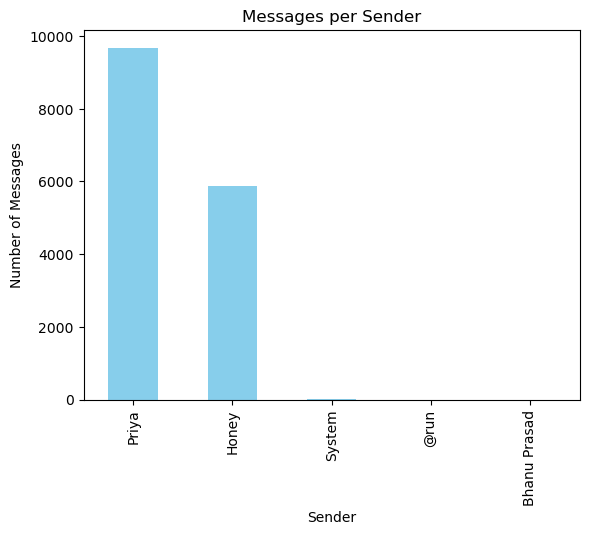

In [12]:
import matplotlib.pyplot as plt

df['Sender'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Messages per Sender")
plt.xlabel("Sender")
plt.ylabel("Number of Messages")
plt.show()


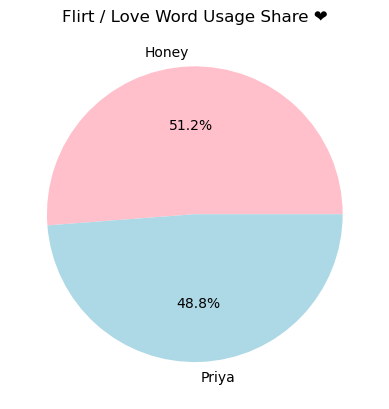

In [13]:
import matplotlib.pyplot as plt

# Only keep senders who actually used love words
flirt_data = {k: v for k, v in percentages.items() if v > 0}

plt.pie(flirt_data.values(),
        labels=flirt_data.keys(),
        autopct='%1.1f%%',
        colors=['pink', 'lightblue', 'lightgreen', 'orange', 'purple'])
plt.title("Flirt / Love Word Usage Share ❤️")
plt.show()


In [14]:
!pip install wordcloud


C:\Users\Priyadharshini\anaconda3\envs\tsa_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


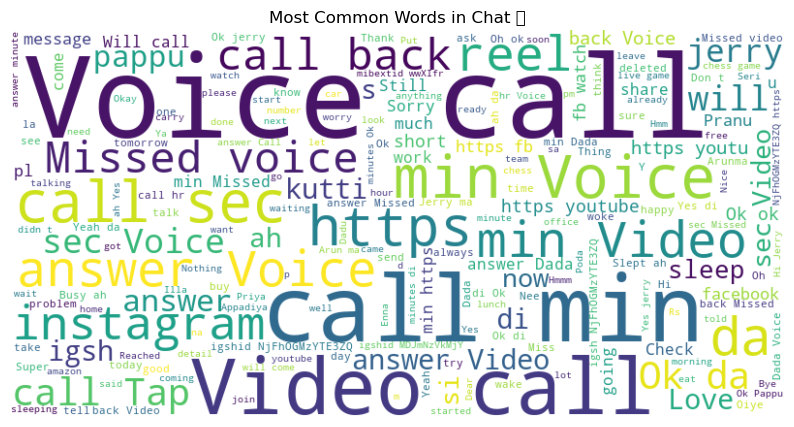

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all messages into one big string
text = " ".join(df['Message'].dropna().astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Show the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Chat 🌀")
plt.show()
